In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [21]:
f=fits.open("./weather_STRIP_18mm.fits")

In [22]:
# cosa sono le unit?

In [230]:
seasonal_matrix_50 = np.empty(shape=[12, 24])
seasonal_matrix_68 = np.empty(shape=[12, 24])
seasonal_matrix_90 = np.empty(shape=[12, 24])

for i in range(1, 13):
    for j in range(0, 24):
        tqv_cdf=f[i].data['TQV'][j, 2]
        seasonal_matrix_50[i-1, j] =tqv_cdf
        
        tqv_cdf=f[i].data['TQV'][j, 2]
        seasonal_matrix_68[i-1, j] =tqv_cdf
        
        tqv_cdf=f[i].data['TQV'][j, 2]
        seasonal_matrix_90[i-1, j] =tqv_cdf
   

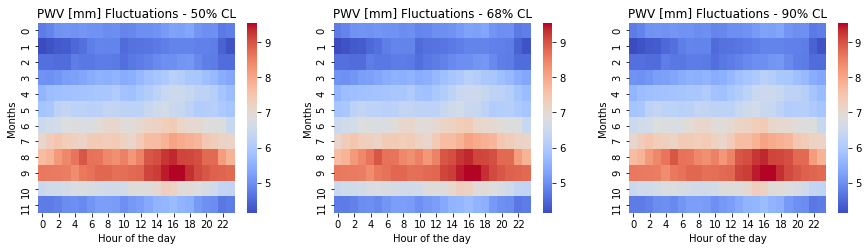

In [232]:
plt.figure(figsize=(15, 3.5))

plt.subplot(131)
plt.title("PWV [mm] Fluctuations - 50% CL")
sns.heatmap(seasonal_matrix_50, cmap="coolwarm")#, vmin=7, vmax=18)
plt.xlabel("Hour of the day")
plt.ylabel("Months")

plt.subplot(132)
plt.title("PWV [mm] Fluctuations - 68% CL")
sns.heatmap(seasonal_matrix_68, cmap="coolwarm")#, vmin=7, vmax=18)
plt.xlabel("Hour of the day")
plt.ylabel("Months")

plt.subplot(133)
plt.title("PWV [mm] Fluctuations - 90% CL")
sns.heatmap(seasonal_matrix_90, cmap="coolwarm")#, vmin=7, vmax=18)
plt.xlabel("Hour of the day")
plt.ylabel("Months")

plt.savefig("Seasonal_matrix.svg", format="svg")


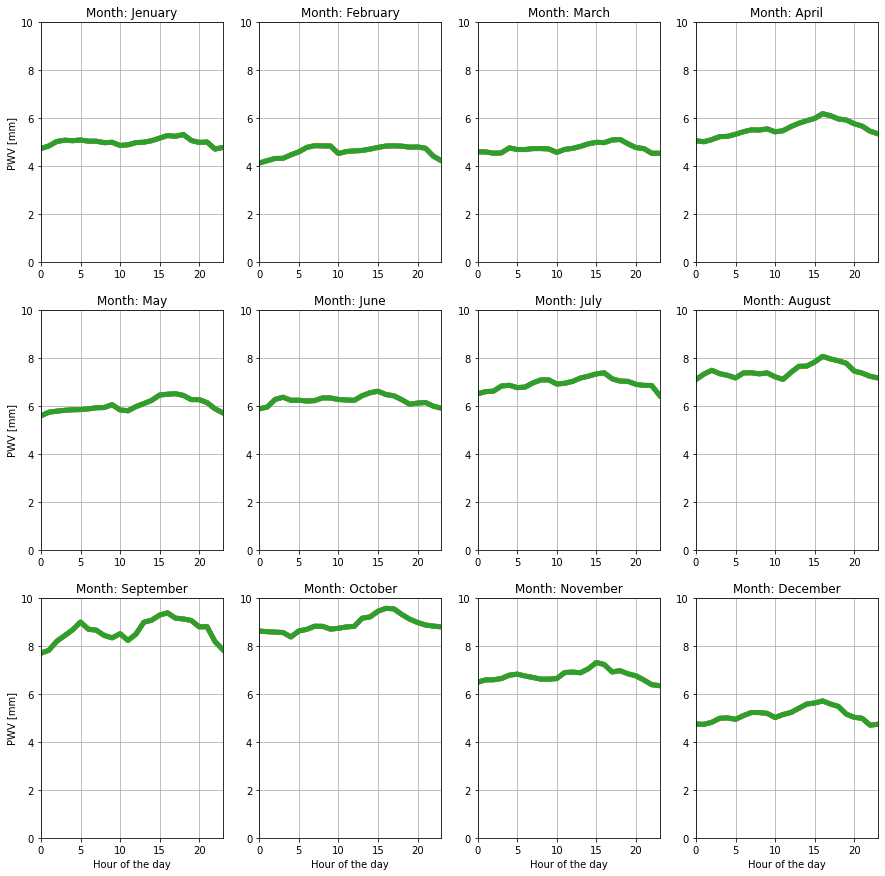

In [234]:
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 5
months = ["Jenuary", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

layout = np.zeros((3, 4), dtype=int)
for i in range(3):
    for j in range(4):
        layout[i, j] = 4*i + j + 1
axd = plt.figure(figsize=(15,15)).subplot_mosaic(layout, empty_sentinel=0)
for i in range(3):
    for j in range(4):
        axd[layout[i, j]].plot(seasonal_matrix_50[4*i+j,:])
        axd[layout[i, j]].plot(seasonal_matrix_68[4*i+j,:])
        axd[layout[i, j]].plot(seasonal_matrix_90[4*i+j,:])
        axd[layout[i, j]].set_ylim((0, 10))
        axd[layout[i, j]].set_xlim((0, 23))
        axd[layout[i, j]].set_title("Month: "+months[4*i+j])
        if (4*i+j) % 4 == 0:
            axd[layout[i, j]].set_xlabel("")
            axd[layout[i, j]].set_ylabel("PWV [mm]")
        if i == 2:
            axd[layout[i, j]].set_xlabel("Hour of the day")
        axd[layout[i, j]].grid()
            
plt.savefig("Months_plot.svg", format="svg")
            

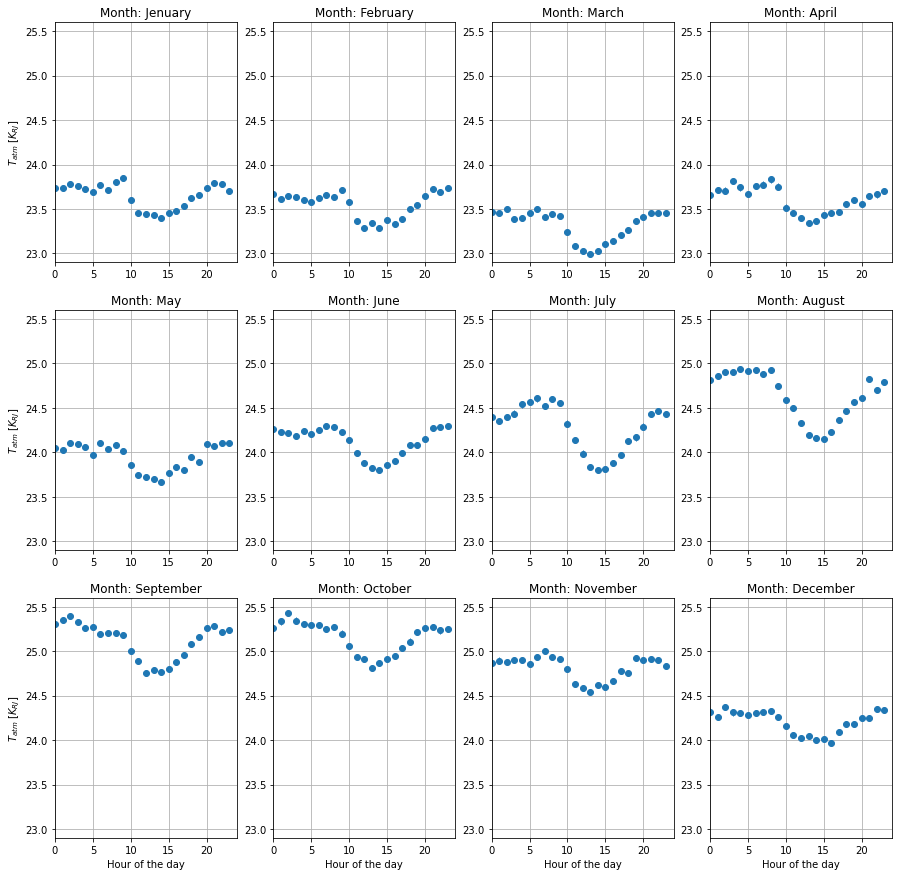

In [32]:
t_atm_40GHz_K = np.load("t_atm_strip_18mm.npy")
mpl.rcParams['lines.linewidth'] = 1
t_atm_40GHz = np.median(t_atm_40GHz_K, axis=2)
std_dev = np.std(t_atm_40GHz_K[:, :, :], axis=2)/np.sqrt(27*72)
layout = np.zeros((3, 4), dtype=int)

years = 121
samples = 28

for i in range(3):
    for j in range(4):
        layout[i, j] = 4*i + j + 1
axd = plt.figure(figsize=(15,15)).subplot_mosaic(layout, empty_sentinel=0)
for i in range(3):
    for j in range(4):
        axd[layout[i, j]].errorbar(range(0, 24),t_atm_40GHz[i*4+j, :]-2.73, std_dev[i-4+j, :], fmt='o')
        axd[layout[i, j]].set_xlim((0, 24))
        axd[layout[i, j]].set_title("Month: "+months[4*i+j])
        if (4*i+j) % 4 == 0:
            axd[layout[i, j]].set_xlabel("")
            axd[layout[i, j]].set_ylabel("$T_{atm}$ [$K_{RJ}$]")
        if i == 2:
            axd[layout[i, j]].set_xlabel("Hour of the day")
        axd[layout[i, j]].grid()
        
        if i == 0:
            axd[layout[i, j]].set_ylim((22.9, 25.6))
        if i == 1:
            axd[layout[i, j]].set_ylim((22.9, 25.6))
        if i == 2:
            axd[layout[i, j]].set_ylim((22.9, 25.6))
            
            

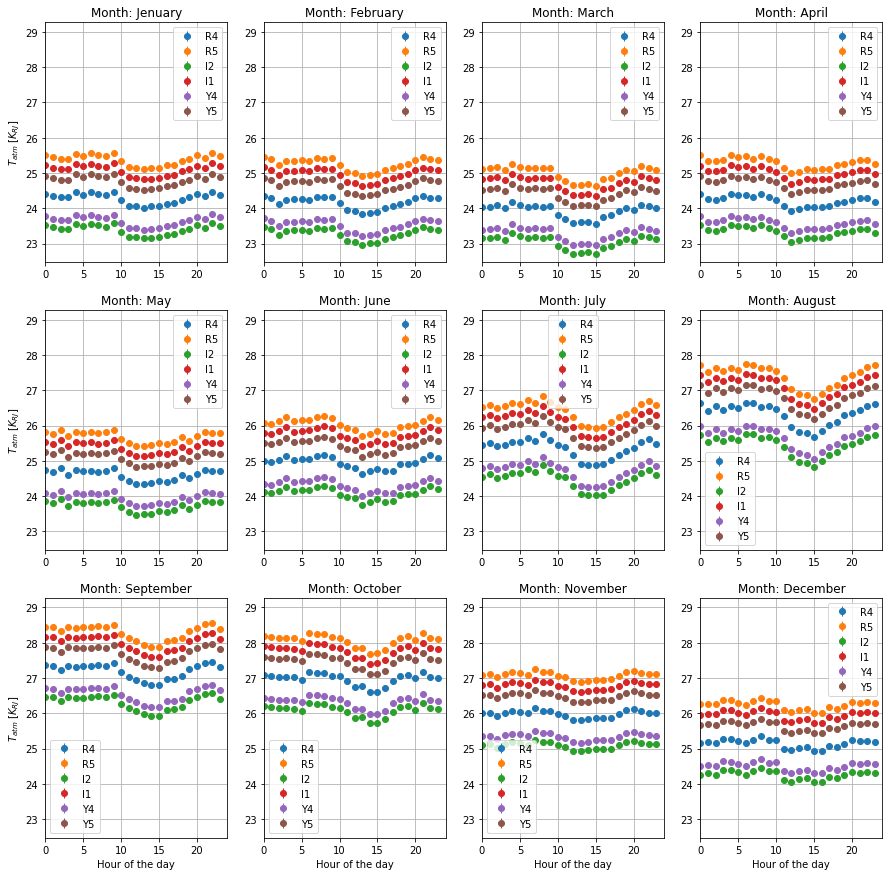

In [33]:
Q_detectors = np.array(["B0", "B1", "B2", "B3", "B4", "B5", "B6",
              "G0", "G1", "G2", "G3", "G4", "G5", "G6",
              "I0", "I1", "I2", "I3", "I4", "I5", "I6",
              "O0", "O1", "O2", "O3", "O4", "O5", "O6",
              "R0", "R1", "R2", "R3", "R4", "R5", "R6",
              "V0", "V1", "V2", "V3", "V4", "V5", "V6",
              "Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6"])

t_atm_40GHz_K_band = np.load("bandshapes/t_atm_par_bandshapes.npy")
mpl.rcParams['lines.linewidth'] = 1
layout = np.zeros((3, 4), dtype=int)

for i in range(3):
    for j in range(4):
        layout[i, j] = 4*i + j + 1
axd = plt.figure(figsize=(15,15)).subplot_mosaic(layout, empty_sentinel=0)

grid_idx = 0

for det in [32, 33, 16, 15, 46, 47]:
    t_atm_40GHz = np.median(t_atm_40GHz_K_band[det, :, :, :], axis=2)
    std_dev = np.std(t_atm_40GHz_K_band[det, :, :, :], axis=2)/np.sqrt(27*72)
    years = 121
    samples = 28

    for i in range(3):
        for j in range(4):
            
            if grid_idx == 0:
                axd[layout[i, j]].grid()
                
            axd[layout[i, j]].errorbar(range(0, 24),t_atm_40GHz[i*4+j, :]-2.73, std_dev[i-4+j, :], fmt='o', label=Q_detectors[det])
            axd[layout[i, j]].legend()
            axd[layout[i, j]].set_xlim((0, 24))
            axd[layout[i, j]].set_title("Month: "+months[4*i+j])
            if (4*i+j) % 4 == 0:
                axd[layout[i, j]].set_xlabel("")
                axd[layout[i, j]].set_ylabel("$T_{atm}$ [$K_{RJ}$]")
            if i == 2:
                axd[layout[i, j]].set_xlabel("Hour of the day")     
            if i == 0:
                axd[layout[i, j]].set_ylim((25.2-2.73, 32-2.73))
            if i == 1:
                axd[layout[i, j]].set_ylim((25.2-2.73, 32-2.73))
            if i == 2:
                axd[layout[i, j]].set_ylim((25.2-2.73, 32-2.73))
    
    grid_idx = grid_idx + 1
plt.savefig("Tatm_Band_R4R5I2I1Y4Y5.png")

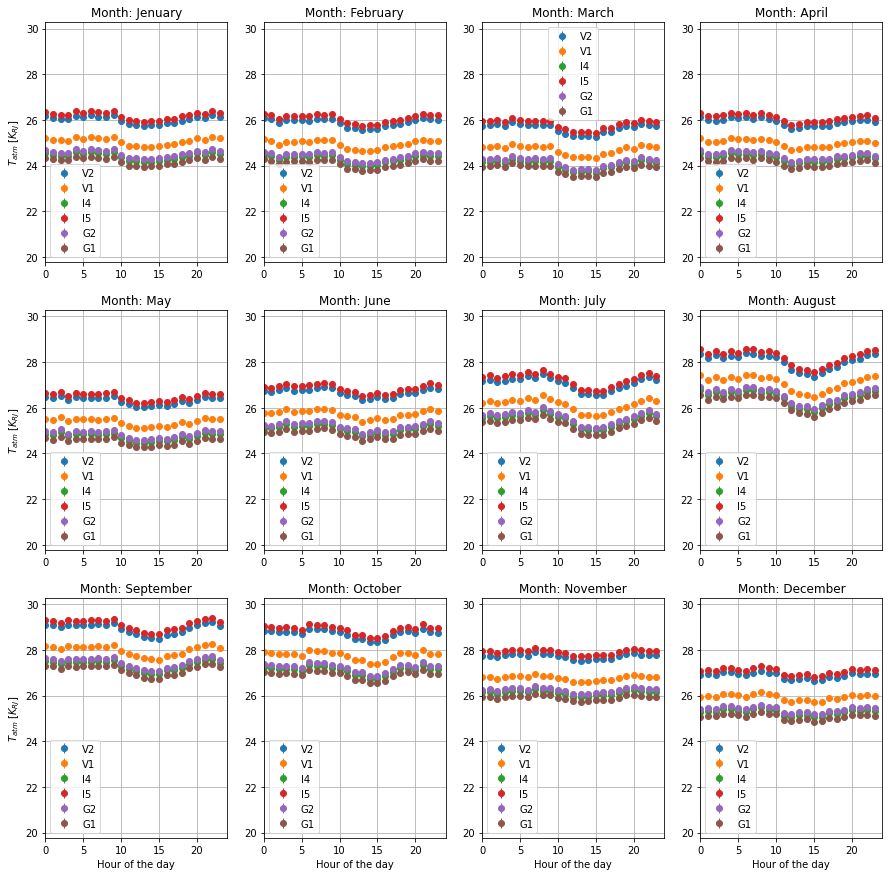

In [12]:
Q_detectors = np.array(["B0", "B1", "B2", "B3", "B4", "B5", "B6",
              "G0", "G1", "G2", "G3", "G4", "G5", "G6",
              "I0", "I1", "I2", "I3", "I4", "I5", "I6",
              "O0", "O1", "O2", "O3", "O4", "O5", "O6",
              "R0", "R1", "R2", "R3", "R4", "R5", "R6",
              "V0", "V1", "V2", "V3", "V4", "V5", "V6",
              "Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6"])

t_atm_40GHz_K_band = np.load("bandshapes/t_atm_par_bandshapes.npy")
mpl.rcParams['lines.linewidth'] = 1
layout = np.zeros((3, 4), dtype=int)

for i in range(3):
    for j in range(4):
        layout[i, j] = 4*i + j + 1
axd = plt.figure(figsize=(15,15)).subplot_mosaic(layout, empty_sentinel=0)

grid_idx = 0

for det in [37, 36, 18, 19, 9, 8]:
    t_atm_40GHz = np.median(t_atm_40GHz_K_band[det, :, :, :], axis=2)
    std_dev = np.std(t_atm_40GHz_K_band[det, :, :, :], axis=2)/27
    years = 121
    samples = 28

    for i in range(3):
        for j in range(4):
            
            if grid_idx == 0:
                axd[layout[i, j]].grid()
                
            axd[layout[i, j]].errorbar(range(0, 24),t_atm_40GHz[i*4+j, :]-2.73, std_dev[i-4+j, :], fmt='o', label=Q_detectors[det])
            axd[layout[i, j]].legend()
            axd[layout[i, j]].set_xlim((0, 24))
            axd[layout[i, j]].set_title("Month: "+months[4*i+j])
            if (4*i+j) % 4 == 0:
                axd[layout[i, j]].set_xlabel("")
                axd[layout[i, j]].set_ylabel("$T_{atm}$ [$K_{RJ}$]")
            if i == 2:
                axd[layout[i, j]].set_xlabel("Hour of the day")     
            if i == 0:
                axd[layout[i, j]].set_ylim((22.5-2.73, 33-2.73))
            if i == 1:
                axd[layout[i, j]].set_ylim((22.5-2.73, 33-2.73))
            if i == 2:
                axd[layout[i, j]].set_ylim((22.5-2.73, 33-2.73))
    
    grid_idx = grid_idx + 1

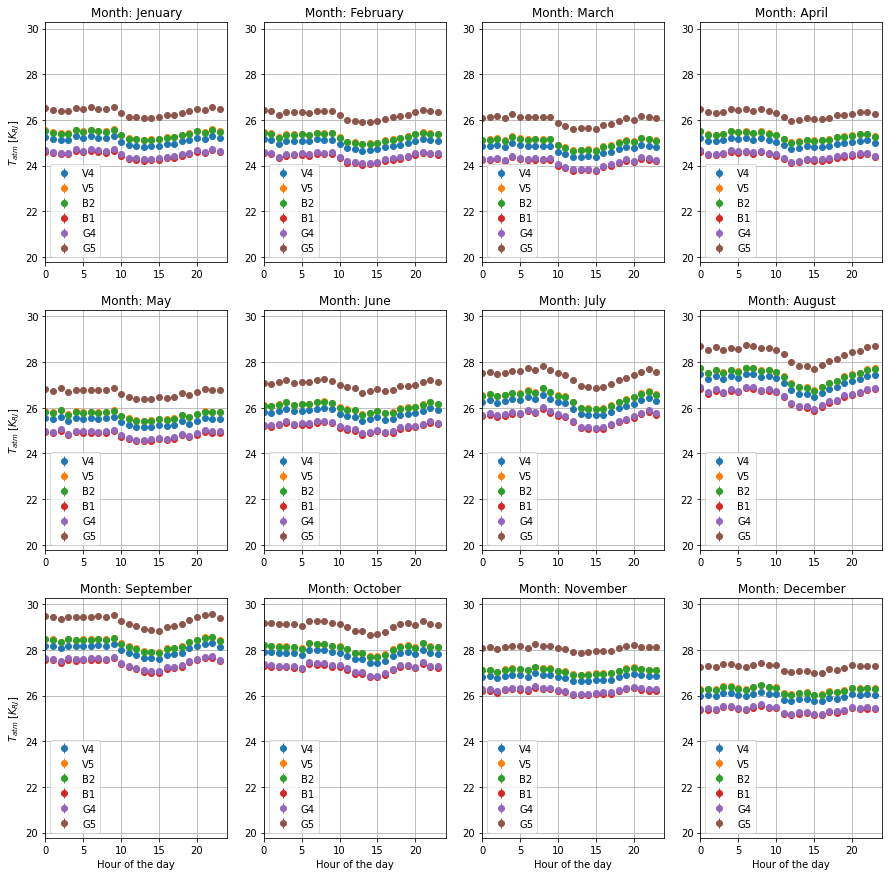

In [13]:
Q_detectors = np.array(["B0", "B1", "B2", "B3", "B4", "B5", "B6",
              "G0", "G1", "G2", "G3", "G4", "G5", "G6",
              "I0", "I1", "I2", "I3", "I4", "I5", "I6",
              "O0", "O1", "O2", "O3", "O4", "O5", "O6",
              "R0", "R1", "R2", "R3", "R4", "R5", "R6",
              "V0", "V1", "V2", "V3", "V4", "V5", "V6",
              "Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6"])

t_atm_40GHz_K_band = np.load("bandshapes/t_atm_par_bandshapes.npy")
mpl.rcParams['lines.linewidth'] = 1
layout = np.zeros((3, 4), dtype=int)

for i in range(3):
    for j in range(4):
        layout[i, j] = 4*i + j + 1
axd = plt.figure(figsize=(15,15)).subplot_mosaic(layout, empty_sentinel=0)

grid_idx = 0

for det in [39, 40, 2, 1, 11, 12]:
    t_atm_40GHz = np.median(t_atm_40GHz_K_band[det, :, :, :], axis=2)
    std_dev = np.std(t_atm_40GHz_K_band[det, :, :, :], axis=2)/27
    years = 121
    samples = 28

    for i in range(3):
        for j in range(4):
            
            if grid_idx == 0:
                axd[layout[i, j]].grid()
                
            axd[layout[i, j]].errorbar(range(0, 24),t_atm_40GHz[i*4+j, :]-2.73, std_dev[i-4+j, :], fmt='o', label=Q_detectors[det])
            axd[layout[i, j]].legend()
            axd[layout[i, j]].set_xlim((0, 24))
            axd[layout[i, j]].set_title("Month: "+months[4*i+j])
            if (4*i+j) % 4 == 0:
                axd[layout[i, j]].set_xlabel("")
                axd[layout[i, j]].set_ylabel("$T_{atm}$ [$K_{RJ}$]")
            if i == 2:
                axd[layout[i, j]].set_xlabel("Hour of the day")     
            if i == 0:
                axd[layout[i, j]].set_ylim((22.5-2.73, 33-2.73))
            if i == 1:
                axd[layout[i, j]].set_ylim((22.5-2.73, 33-2.73))
            if i == 2:
                axd[layout[i, j]].set_ylim((22.5-2.73, 33-2.73))
    
    grid_idx = grid_idx + 1

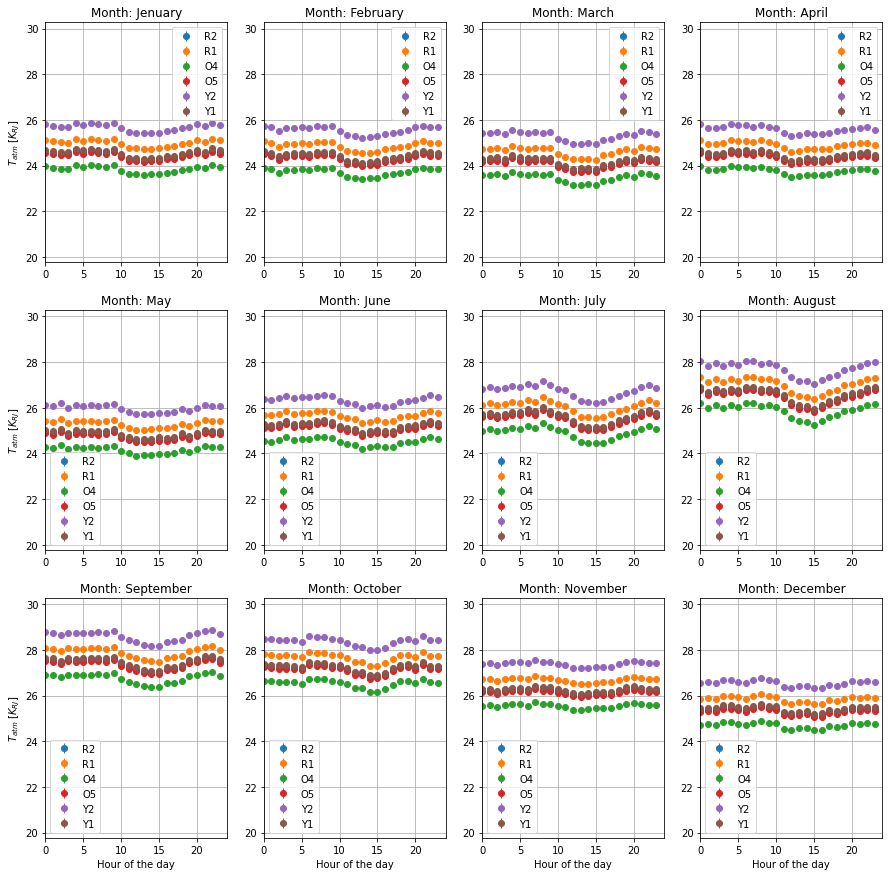

In [14]:
Q_detectors = np.array(["B0", "B1", "B2", "B3", "B4", "B5", "B6",
              "G0", "G1", "G2", "G3", "G4", "G5", "G6",
              "I0", "I1", "I2", "I3", "I4", "I5", "I6",
              "O0", "O1", "O2", "O3", "O4", "O5", "O6",
              "R0", "R1", "R2", "R3", "R4", "R5", "R6",
              "V0", "V1", "V2", "V3", "V4", "V5", "V6",
              "Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6"])

t_atm_40GHz_K_band = np.load("bandshapes/t_atm_par_bandshapes.npy")
mpl.rcParams['lines.linewidth'] = 1
layout = np.zeros((3, 4), dtype=int)

for i in range(3):
    for j in range(4):
        layout[i, j] = 4*i + j + 1
axd = plt.figure(figsize=(15,15)).subplot_mosaic(layout, empty_sentinel=0)

grid_idx = 0

for det in [30, 29, 25, 26, 44, 43]:
    t_atm_40GHz = np.median(t_atm_40GHz_K_band[det, :, :, :], axis=2)
    std_dev = np.std(t_atm_40GHz_K_band[det, :, :, :], axis=2)/27
    years = 121
    samples = 28

    for i in range(3):
        for j in range(4):
            
            if grid_idx == 0:
                axd[layout[i, j]].grid()
                
            axd[layout[i, j]].errorbar(range(0, 24),t_atm_40GHz[i*4+j, :]-2.73, std_dev[i-4+j, :], fmt='o', label=Q_detectors[det])
            axd[layout[i, j]].legend()
            axd[layout[i, j]].set_xlim((0, 24))
            axd[layout[i, j]].set_title("Month: "+months[4*i+j])
            if (4*i+j) % 4 == 0:
                axd[layout[i, j]].set_xlabel("")
                axd[layout[i, j]].set_ylabel("$T_{atm}$ [$K_{RJ}$]")
            if i == 2:
                axd[layout[i, j]].set_xlabel("Hour of the day")     
            if i == 0:
                axd[layout[i, j]].set_ylim((22.5-2.73, 33-2.73))
            if i == 1:
                axd[layout[i, j]].set_ylim((22.5-2.73, 33-2.73))
            if i == 2:
                axd[layout[i, j]].set_ylim((22.5-2.73, 33-2.73))
    
    grid_idx = grid_idx + 1

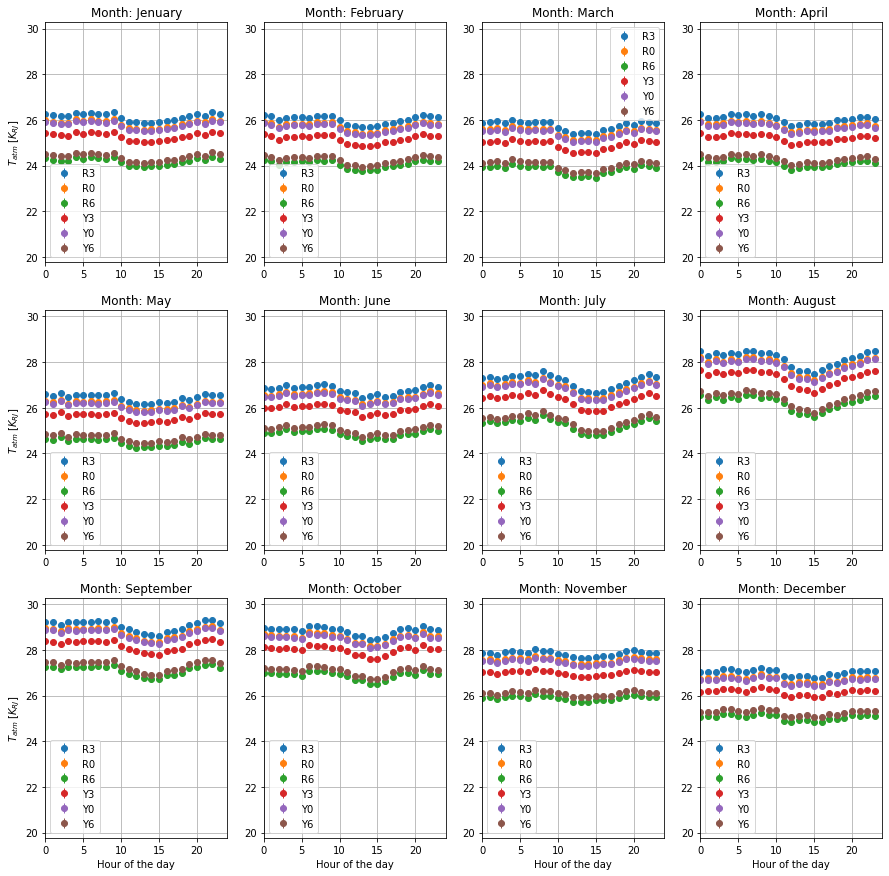

In [15]:
Q_detectors = np.array(["B0", "B1", "B2", "B3", "B4", "B5", "B6",
              "G0", "G1", "G2", "G3", "G4", "G5", "G6",
              "I0", "I1", "I2", "I3", "I4", "I5", "I6",
              "O0", "O1", "O2", "O3", "O4", "O5", "O6",
              "R0", "R1", "R2", "R3", "R4", "R5", "R6",
              "V0", "V1", "V2", "V3", "V4", "V5", "V6",
              "Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6"])

t_atm_40GHz_K_band = np.load("bandshapes/t_atm_par_bandshapes.npy")
mpl.rcParams['lines.linewidth'] = 1
layout = np.zeros((3, 4), dtype=int)

for i in range(3):
    for j in range(4):
        layout[i, j] = 4*i + j + 1
axd = plt.figure(figsize=(15,15)).subplot_mosaic(layout, empty_sentinel=0)

grid_idx = 0

for det in [31, 28, 34, 45, 42, 48]:
    t_atm_40GHz = np.median(t_atm_40GHz_K_band[det, :, :, :], axis=2)
    std_dev = np.std(t_atm_40GHz_K_band[det, :, :, :], axis=2)/27
    years = 121
    samples = 28

    for i in range(3):
        for j in range(4):
            
            if grid_idx == 0:
                axd[layout[i, j]].grid()
                
            axd[layout[i, j]].errorbar(range(0, 24),t_atm_40GHz[i*4+j, :]-2.73, std_dev[i-4+j, :], fmt='o', label=Q_detectors[det])
            axd[layout[i, j]].legend()
            axd[layout[i, j]].set_xlim((0, 24))
            axd[layout[i, j]].set_title("Month: "+months[4*i+j])
            if (4*i+j) % 4 == 0:
                axd[layout[i, j]].set_xlabel("")
                axd[layout[i, j]].set_ylabel("$T_{atm}$ [$K_{RJ}$]")
            if i == 2:
                axd[layout[i, j]].set_xlabel("Hour of the day")     
            if i == 0:
                axd[layout[i, j]].set_ylim((22.5-2.73, 33-2.73))
            if i == 1:
                axd[layout[i, j]].set_ylim((22.5-2.73, 33-2.73))
            if i == 2:
                axd[layout[i, j]].set_ylim((22.5-2.73, 33-2.73))
    
    grid_idx = grid_idx + 1

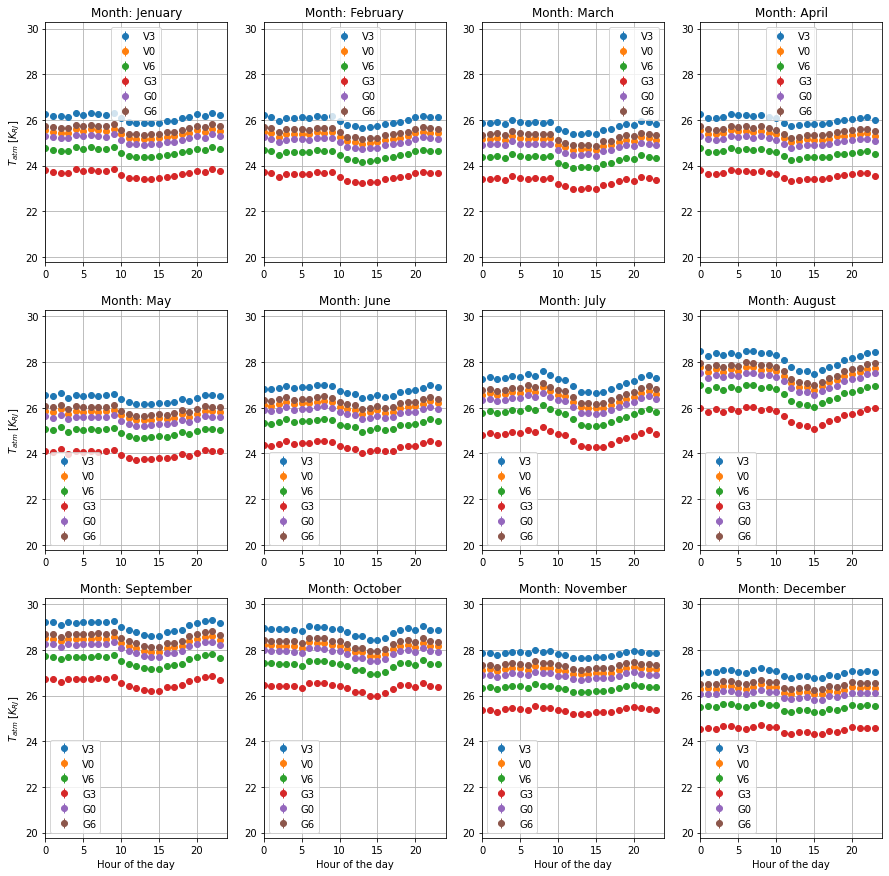

In [16]:
Q_detectors = np.array(["B0", "B1", "B2", "B3", "B4", "B5", "B6",
              "G0", "G1", "G2", "G3", "G4", "G5", "G6",
              "I0", "I1", "I2", "I3", "I4", "I5", "I6",
              "O0", "O1", "O2", "O3", "O4", "O5", "O6",
              "R0", "R1", "R2", "R3", "R4", "R5", "R6",
              "V0", "V1", "V2", "V3", "V4", "V5", "V6",
              "Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6"])

t_atm_40GHz_K_band = np.load("bandshapes/t_atm_par_bandshapes.npy")
mpl.rcParams['lines.linewidth'] = 1
layout = np.zeros((3, 4), dtype=int)

for i in range(3):
    for j in range(4):
        layout[i, j] = 4*i + j + 1
axd = plt.figure(figsize=(15,15)).subplot_mosaic(layout, empty_sentinel=0)

grid_idx = 0

for det in [38, 35, 41, 10, 7, 13]:
    t_atm_40GHz = np.median(t_atm_40GHz_K_band[det, :, :, :], axis=2)
    std_dev = np.std(t_atm_40GHz_K_band[det, :, :, :], axis=2)/27
    years = 121
    samples = 28

    for i in range(3):
        for j in range(4):
            
            if grid_idx == 0:
                axd[layout[i, j]].grid()
                
            axd[layout[i, j]].errorbar(range(0, 24),t_atm_40GHz[i*4+j, :]-2.73, std_dev[i-4+j, :], fmt='o', label=Q_detectors[det])
            axd[layout[i, j]].legend()
            axd[layout[i, j]].set_xlim((0, 24))
            axd[layout[i, j]].set_title("Month: "+months[4*i+j])
            if (4*i+j) % 4 == 0:
                axd[layout[i, j]].set_xlabel("")
                axd[layout[i, j]].set_ylabel("$T_{atm}$ [$K_{RJ}$]")
            if i == 2:
                axd[layout[i, j]].set_xlabel("Hour of the day")     
            if i == 0:
                axd[layout[i, j]].set_ylim((22.5-2.73, 33-2.73))
            if i == 1:
                axd[layout[i, j]].set_ylim((22.5-2.73, 33-2.73))
            if i == 2:
                axd[layout[i, j]].set_ylim((22.5-2.73, 33-2.73))
    
    grid_idx = grid_idx + 1

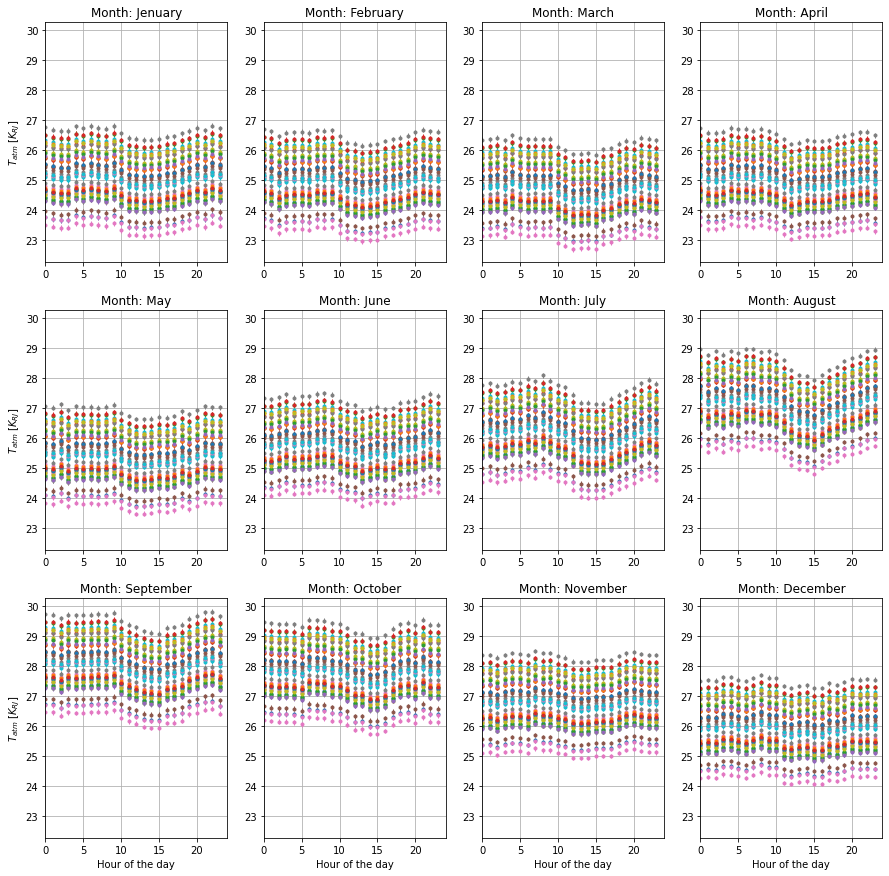

In [17]:
Q_detectors = np.array(["B0", "B1", "B2", "B3", "B4", "B5", "B6",
              "G0", "G1", "G2", "G3", "G4", "G5", "G6",
              "I0", "I1", "I2", "I3", "I4", "I5", "I6",
              "O0", "O1", "O2", "O3", "O4", "O5", "O6",
              "R0", "R1", "R2", "R3", "R4", "R5", "R6",
              "V0", "V1", "V2", "V3", "V4", "V5", "V6",
              "Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6"])

t_atm_40GHz_K_band = np.load("bandshapes/t_atm_par_bandshapes.npy")
mpl.rcParams['lines.linewidth'] = 1
layout = np.zeros((3, 4), dtype=int)

for i in range(3):
    for j in range(4):
        layout[i, j] = 4*i + j + 1
axd = plt.figure(figsize=(15,15)).subplot_mosaic(layout, empty_sentinel=0)

grid_idx = 0

for det in range(0, 49):
    t_atm_40GHz = np.median(t_atm_40GHz_K_band[det, :, :, :], axis=2)
    std_dev = np.std(t_atm_40GHz_K_band[det, :, :, :], axis=2)/27
    years = 121
    samples = 28

    for i in range(3):
        for j in range(4):
            
            if grid_idx == 0:
                axd[layout[i, j]].grid()
                
            axd[layout[i, j]].errorbar(range(0, 24),t_atm_40GHz[i*4+j, :]-2.73, std_dev[i-4+j, :], fmt='.', label=Q_detectors[det])
            # axd[layout[i, j]].legend()
            axd[layout[i, j]].set_xlim((0, 24))
            axd[layout[i, j]].set_title("Month: "+months[4*i+j])
            if (4*i+j) % 4 == 0:
                axd[layout[i, j]].set_xlabel("")
                axd[layout[i, j]].set_ylabel("$T_{atm}$ [$K_{RJ}$]")
            if i == 2:
                axd[layout[i, j]].set_xlabel("Hour of the day")     
            if i == 0:
                axd[layout[i, j]].set_ylim((25-2.73, 33-2.73))
            if i == 1:
                axd[layout[i, j]].set_ylim((25-2.73, 33-2.73))
            if i == 2:
                axd[layout[i, j]].set_ylim((25-2.73, 33-2.73))
    
    grid_idx = grid_idx + 1

# QUIJOTE $T_{atm}$ : From 2012 to 2015

In [253]:
import fitsio
from astropy.time import Time
t_atm_quj = fitsio.FITS("tatm_quijote_dec2012_feb2015.fits")

JD = Time(t_atm_quj[1]['JD'][0], format='jd')

# Ricardo's words:
# Tatm and their errors have a format [444,4,2,4] where the first index runs over the individual observations, 
# and the [4,2,4] matrix is associated with the 32 individual channels of the MFI, 
# which correspond to the following frequencies:
# 11 GHz: [0,0,*] and [2,0,*]
# 13 GHz: [0,1,*] and [2,1,*]
# 17 GHz: [1,0,*] and [3,0,*]
# 19 GHz: [1,1,*] and [3,1,*]


In [254]:
sim_11GHz = np.amin(np.load('t_atm_quijote_11GHz.npy'), axis=2)
sim_13GHz = np.amin(np.load('t_atm_quijote_13GHz.npy'), axis=2)
sim_17GHz = np.amin(np.load('t_atm_quijote_17ghz_full.npy'), axis=2)    
sim_19GHz = np.amin(np.load('t_atm_quijote_19ghz_full.npy'), axis=2)

C1_11GHz = t_atm_quj[1]['TATM'][0][:, 0, 0, :] 
C1_11GHz_ERR = t_atm_quj[1]['ERR_TATM'][0][:, 0, 0, :]
C2_11GHz = t_atm_quj[1]['TATM'][0][:, 0, 2, :]
C2_11GHz_ERR = t_atm_quj[1]['ERR_TATM'][0][:, 0, 2, :]

C1_13GHz = t_atm_quj[1]['TATM'][0][:, 1, 0, :]
C1_13GHz_ERR = t_atm_quj[1]['ERR_TATM'][0][:, 1, 0, :]
C2_13GHz = t_atm_quj[1]['TATM'][0][:, 1, 2, :]
C2_13GHz_ERR = t_atm_quj[1]['ERR_TATM'][0][:, 1, 2, :]

C1_17GHz = t_atm_quj[1]['TATM'][0][:, 0, 1, :]
C1_17GHz_ERR = t_atm_quj[1]['ERR_TATM'][0][:, 0, 1, :]
C2_17GHz = t_atm_quj[1]['TATM'][0][:, 0, 3, :]
C2_17GHz_ERR = t_atm_quj[1]['ERR_TATM'][0][:, 0, 3, :]

C1_19GHz = t_atm_quj[1]['TATM'][0][:, 1, 1, :]
C1_19GHz_ERR = t_atm_quj[1]['ERR_TATM'][0][:, 1, 1, :]
C2_19GHz = t_atm_quj[1]['TATM'][0][:, 1, 3, :]
C2_19GHz_ERR = t_atm_quj[1]['ERR_TATM'][0][:, 1, 3, :]

c_11 = np.array([])
c_13 = np.array([])
c_17 = np.array([])
c_19 = np.array([])

for i in JD.isot:
    month = int(i.split("-")[1])
    hour  = int(i.split("T")[1].split(":")[0])
    
    c_11 = np.append(c_11, sim_11GHz[month-1, hour-1]-2.73)
    c_13 = np.append(c_13, sim_13GHz[month-1, hour-1]-2.73)    
    c_17 = np.append(c_17, sim_17GHz[month-1, hour-1]-2.73)    
    c_19 = np.append(c_19, sim_19GHz[month-1, hour-1]-2.73)


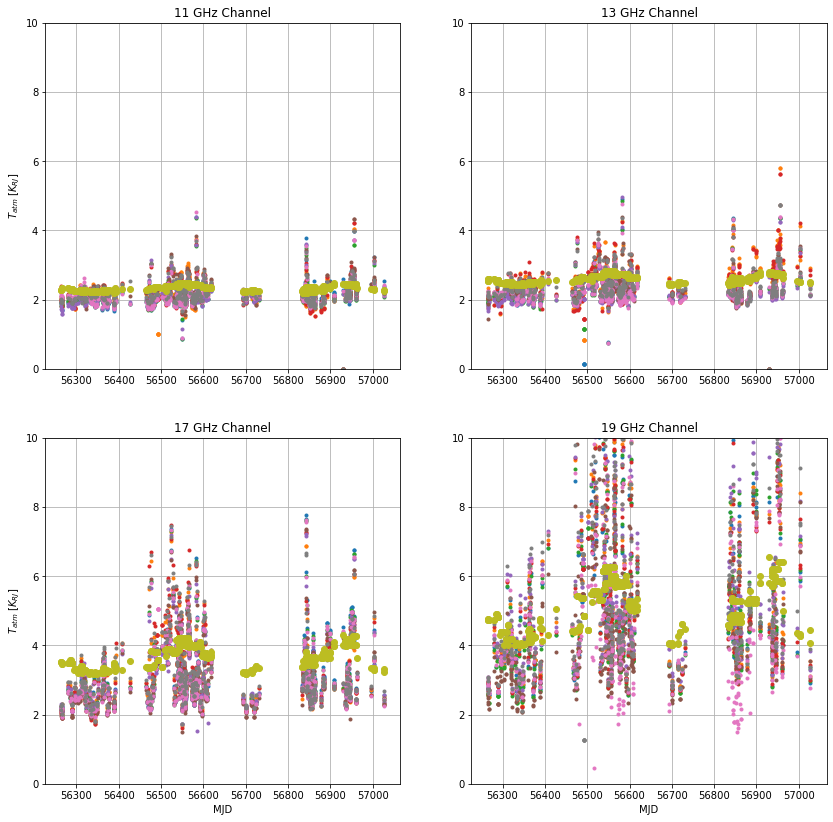

In [294]:
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.title("11 GHz Channel")
plt.ylabel("$T_{atm}$ [$K_{RJ}$]")

coef = 0
upp_lim = 10

for i in range(0, 4):
    plt.plot(JD.mjd, C1_11GHz[i, :], '.')
    plt.plot(JD.mjd, C2_11GHz[i, :], '.')
plt.plot(JD.mjd, c_11-coef, 'o')
#plt.plot(JD.mjd, c_11_18mm, 'o')
plt.ylim((0, upp_lim))
plt.grid()

plt.subplot(222)
plt.title("13 GHz Channel")
for i in range(0, 4):
    plt.plot(JD.mjd, C1_13GHz[i, :], '.')
    plt.plot(JD.mjd, C2_13GHz[i, :], '.')
plt.plot(JD.mjd, c_13-coef, 'o')
#plt.plot(JD.mjd, c_13_18mm, 'o')
plt.ylim((0, upp_lim))
plt.grid()

plt.subplot(223)
plt.title("17 GHz Channel")
plt.ylabel("$T_{atm}$ [$K_{RJ}$]")
plt.xlabel("MJD")

for i in range(0, 4):
    plt.plot(JD.mjd, C1_17GHz[i, :], '.')
    plt.plot(JD.mjd, C2_17GHz[i, :], '.')
plt.plot(JD.mjd, c_17-coef, 'o')
#plt.plot(JD.mjd, c_17_18mm, 'o')
plt.ylim((0, upp_lim))
plt.grid()

plt.subplot(224)
plt.title("19 GHz Channel")
plt.xlabel("MJD")
for i in range(0, 4):
    plt.plot(JD.mjd, C1_19GHz[i, :], '.')
    plt.plot(JD.mjd, C2_19GHz[i, :], '.')
plt.plot(JD.mjd, c_19-coef, 'o')
#plt.plot(JD.mjd, c_19_18mm, 'o')
plt.ylim((0, upp_lim))
plt.grid()

plt.savefig("MFI_QUIJOTE_SIMULATION.png")

In [256]:
t11GHz = np.array([])
t13GHz = np.array([])
t17GHz = np.array([])
t19GHz = np.array([])


for i in range(0, 4):
    t11GHz = np.append(t11GHz, C1_11GHz[i, :])
    t11GHz = np.append(t11GHz, C2_11GHz[i, :])
    

for i in range(0, 4):
    t13GHz = np.append(t13GHz, C1_13GHz[i, :])
    t13GHz = np.append(t13GHz, C2_13GHz[i, :])
    

for i in range(0, 4):
    t17GHz = np.append(t17GHz, C1_17GHz[i, :])
    t17GHz = np.append(t17GHz, C2_17GHz[i, :])

    
for i in range(0, 4):
    t19GHz = np.append(t19GHz, C1_19GHz[i, :])
    t19GHz = np.append(t19GHz, C2_19GHz[i, :])

(0.0, 20.0)

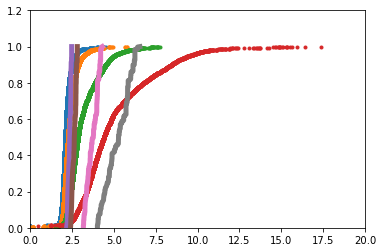

In [257]:
plt.plot(np.sort(t11GHz), np.linspace(0, 1, len(t11GHz)), '.')
plt.plot(np.sort(t13GHz), np.linspace(0, 1, len(t13GHz)), '.')
plt.plot(np.sort(t17GHz), np.linspace(0, 1, len(t17GHz)), '.')
plt.plot(np.sort(t19GHz), np.linspace(0, 1, len(t19GHz)), '.')

plt.plot(np.sort(c_11), np.linspace(0, 1, len(c_11)), '-')
plt.plot(np.sort(c_13), np.linspace(0, 1, len(c_13)), '-')
plt.plot(np.sort(c_17), np.linspace(0, 1, len(c_17)), '-')
plt.plot(np.sort(c_19), np.linspace(0, 1, len(c_19)), '-')

plt.ylim((0, 1.2))
plt.xlim((0, 20))

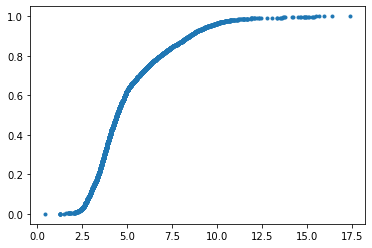

In [258]:
plt.plot(np.sort(t19GHz[t19GHz >= 0]), np.linspace(0, 1, len(t19GHz)-42), '.')

x = np.sort(t19GHz[t19GHz >= 0])
y = np.linspace(0, 1, len(t19GHz)-42)

<ipython-input-259-664a1e592a24>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(np.diff(y)/np.diff(x))


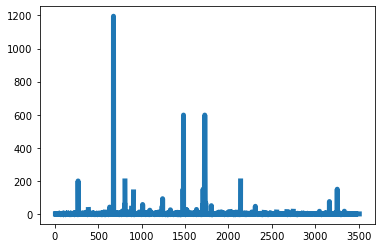

In [259]:
plt.plot(np.diff(y)/np.diff(x))

In [260]:
t_sim_11=np.array([])
t_sim_13=np.array([])
t_sim_17=np.array([])
t_sim_19=np.array([])
t_sim_19_full = np.array([])

t_atm_simulated_11=np.load('t_atm_quijote_11GHz.npy')
t_atm_simulated_13=np.load('t_atm_quijote_13GHz.npy')
t_atm_simulated_17=np.load('t_atm_quijote_17GHz.npy')
t_atm_simulated_19=np.load('t_atm_quijote_19GHz.npy')
t_atm_simulated_19_full=np.load('t_atm_quijote_19ghz_12mm.npy')

np.shape(t_atm_simulated)
for i in range(0, 12):
    for j in range(0, 24):
        t_sim_11 = np.append(t_sim_11, t_atm_simulated_11[i, j, :])
        t_sim_13 = np.append(t_sim_13, t_atm_simulated_13[i, j, :])
        t_sim_17 = np.append(t_sim_17, t_atm_simulated_17[i, j, :])        
        t_sim_19 = np.append(t_sim_19, t_atm_simulated_19[i, j, :])
        t_sim_19_full = np.append(t_sim_19_full, t_atm_simulated_19_full[i, j, :])

t_sim_11=t_sim_11-2.73
t_sim_13=t_sim_13-2.73
t_sim_17=t_sim_17-2.73
t_sim_19=t_sim_19-2.73
t_sim_19_full=t_sim_19_full-2.73


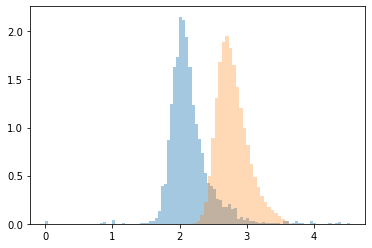

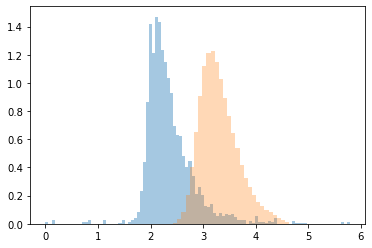

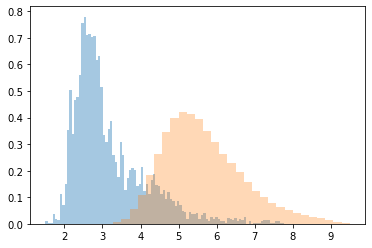

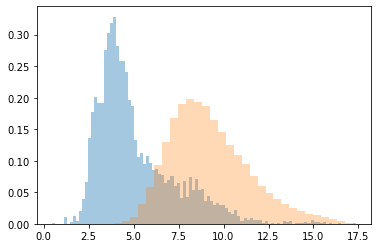

In [298]:
plt.hist(t11GHz[(t11GHz >= 0) & (t11GHz <= 7)], bins=100, cumulative=False, density=True, alpha=0.4)
plt.hist(t_sim_11, bins=30, cumulative=False, density=True, alpha=0.3)

plt.figure(2)

plt.hist(t13GHz[(t13GHz >= 0) & (t13GHz <= 7)], bins=100, cumulative=False, density=True, alpha=0.4)
plt.hist(t_sim_13, bins=30, cumulative=False, density=True, alpha=0.3)

plt.figure(3)

plt.hist(t17GHz[t17GHz >= 0], bins=100, cumulative=False, density=True, alpha=0.4)
plt.hist(t_sim_17, bins=30, cumulative=False, density=True, alpha=0.3)

plt.figure(4)

plt.hist(t19GHz[t19GHz >= 0], bins=100, cumulative=False, density=True, alpha=0.4)
plt.hist(t_sim_19, bins=30, cumulative=False, density=True, alpha=0.3)
#plt.hist(t_sim_19_full, bins=30, cumulative=False, density=True, alpha=0.3)

r11 = np.average(t11GHz)/np.average(t_sim_11)
r13 = np.average(t13GHz)/np.average(t_sim_13)
r17 = np.average(t17GHz)/np.average(t_sim_17)
r19 = np.average(t19GHz)/np.average(t_sim_19)
r19_12mm = np.average(t19GHz)/np.amin(t_sim_19_full)

r = [r11, r13, r17, r19]

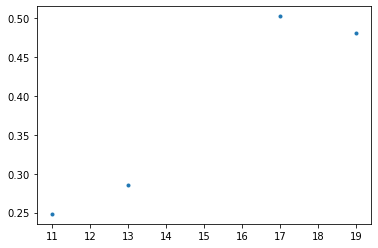

In [296]:
# a,b = np.polyfit(np.array([11, 13, 17, 19]), 1-np.array(r), 1)
# c,d = np.polyfit(np.array([17, 19]), 1-np.array(r[2:4]), 1)
# freq = np.linspace(10, 50, 100)
# r_fit = a * freq + b
# r_fit2 = c*freq + d

plt.plot([11, 13, 17, 19], np.abs(np.array(r)-1), '.')
# plt.plot(freq, r_fit, 'r-')
# plt.plot(freq, r_fit2)


In [250]:
freq 

array([10.        , 10.4040404 , 10.80808081, 11.21212121, 11.61616162,
       12.02020202, 12.42424242, 12.82828283, 13.23232323, 13.63636364,
       14.04040404, 14.44444444, 14.84848485, 15.25252525, 15.65656566,
       16.06060606, 16.46464646, 16.86868687, 17.27272727, 17.67676768,
       18.08080808, 18.48484848, 18.88888889, 19.29292929, 19.6969697 ,
       20.1010101 , 20.50505051, 20.90909091, 21.31313131, 21.71717172,
       22.12121212, 22.52525253, 22.92929293, 23.33333333, 23.73737374,
       24.14141414, 24.54545455, 24.94949495, 25.35353535, 25.75757576,
       26.16161616, 26.56565657, 26.96969697, 27.37373737, 27.77777778,
       28.18181818, 28.58585859, 28.98989899, 29.39393939, 29.7979798 ,
       30.2020202 , 30.60606061, 31.01010101, 31.41414141, 31.81818182,
       32.22222222, 32.62626263, 33.03030303, 33.43434343, 33.83838384,
       34.24242424, 34.64646465, 35.05050505, 35.45454545, 35.85858586,
       36.26262626, 36.66666667, 37.07070707, 37.47474747, 37.87

In [286]:
p2=t_atm_quj[1]['TATM'][0][:,0, 2, :]


(-0.5, 0.5)

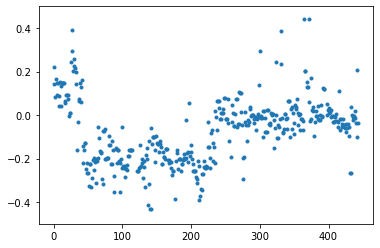

In [293]:
# for i in range(0, 4):
#     plt.plot(p[i])
#     plt.ylim((0, 8))
plt.plot(p[3]-p2[3], ".")
plt.ylim((-0.5, 0.5))